In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use("bmh")

Text(0.5, 0, '$\\theta$')

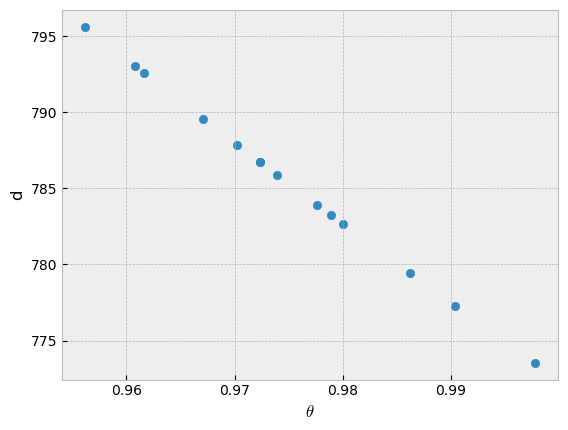

In [2]:
# LASER ROJO
D_DVD = np.array([2.4,3,4,5,6,7,8,9,10,11,12,13,14,15])
D_surco = np.array([3.4,4.4,6.1,7.3,8.9,10.3,11.9,13.6,15.5,16.4,17.2,18.6,20.3,22])

#Angulos
angulos = np.arctan(D_surco/D_DVD)

# Error angulos
err_ang = -0.0005/(D_DVD*(1+(D_surco/D_DVD)**2)) + 0.0005*D_surco/( (1+(D_surco/D_DVD)**2)*D_DVD**2) 


# Distancia entre surcos
d = 650/np.sin(angulos)

# Error d_v
err_d = 0.375/np.sin(angulos) - (650*err_ang)/(np.sin(angulos)*np.tan(angulos))

#Grafico angulo vs Distancias
plt.scatter(angulos, d)
plt.ylabel("d")
plt.xlabel(r"$\theta$")

In [3]:
np.mean(d)

785.5745280313987

In [4]:
print("Promedio de d:", np.mean(d))
a = 97.4/785.574 * 10**5
v = a/1.2
print(v/60)

Promedio de d: 785.5745280313987
172.20246313877215


In [5]:
print(err_ang)
print(err_d)
print(a)

[2.88683603e-05 2.46826516e-05 1.97331329e-05 1.46889769e-05
 1.25857130e-05 1.06389838e-05 9.48397451e-06 8.64791698e-06
 8.08229243e-06 6.92378706e-06 5.91124045e-06 5.43731552e-06
 5.18015425e-06 4.93653032e-06]
[0.4428014  0.44063066 0.43837564 0.44660244 0.44560678 0.44772226
 0.44686893 0.4452162  0.44223746 0.44790654 0.45397767 0.45450101
 0.45271146 0.45122232]
12398.577345991594


In [6]:
def recta(x, A, B):
    return x*A + B

In [7]:
ajuste_recta = curve_fit(recta, angulos, d)[0]

In [8]:
xx = np.linspace(angulos.min(),angulos.max(),10**3)
def graf(A=1,B=1):
    plt.errorbar(angulos, d, xerr =err_ang, yerr=err_d, fmt = "o", color = "darkblue",ecolor = "darkblue" )
    plt.plot(xx, recta(xx, A,B), color="red", ls = "--")
    plt.xlabel(r"$\theta$ [rad]")
    plt.ylabel(r"D [nm]")
    plt.grid(True)
    res = d - recta(angulos, ajuste_recta[0], ajuste_recta[1])
    st = np.sum((d - np.mean(d))**2)
    sr = np.sum(res**2)
    r2 = (st - sr)/st
    print("Coef de determinación:",r2)

Coef de determinación: 0.999648572818408


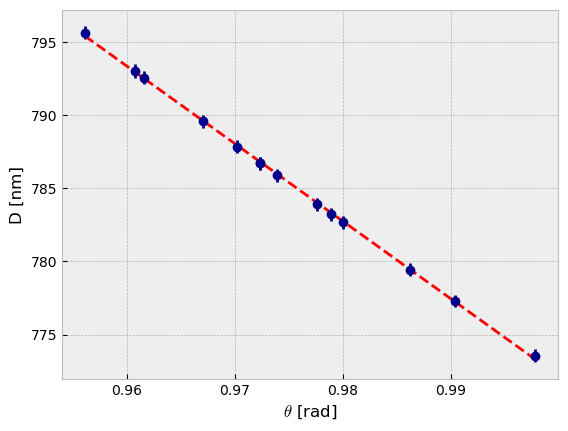

In [9]:
graf(ajuste_recta[0], ajuste_recta[1])
plt.savefig("laser_rojo.pdf")

In [10]:
matriz = curve_fit(recta, angulos, d)[1]
sigma_a, sigma_b = np.sqrt(np.diagonal(matriz))
print(sigma_a, sigma_b)
print(ajuste_recta[0], ajuste_recta[1])
print(recta(0.956, ajuste_recta[0], ajuste_recta[1])) # Valor estimado por la aproximación lineal.

2.8711389516116688 2.7986152860155
-530.4576892085862 1302.5987614254207
795.4812105420123


Text(0.5, 0, '$\\theta$')

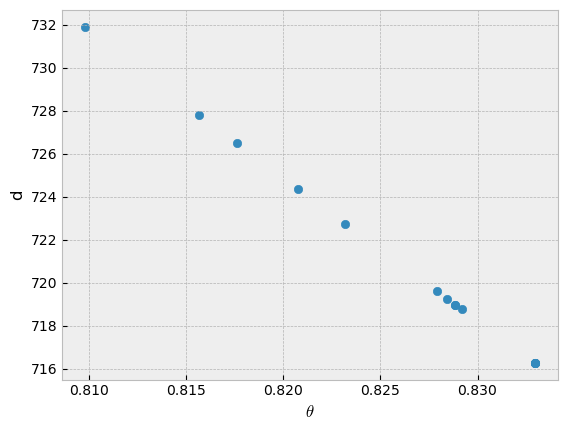

In [11]:
# LASER VERDE
#D_DVD_v = np.array([2.2,3,4,5,6,7,8,9,10,11,12,13,14,15])
#D_surco_v = np.array([2.4,3.2,4.2,5.7,6.6,7.7,8.5,9.8,10.9,12,13.1,14.3,15.1,16.1])

D_DVD_v = np.array([2.2,3,4,5,6,7,8,9,10,11,12,13,14,15])
D_surco_v = np.array([2.4,3.2,4.2,5.5,6.6,7.7,8.5,9.8,10.9,12,13.1,14.3,15.1,16.1])



#Angulos
angulos_v = np.arctan(D_surco_v/D_DVD_v)

# Error angulos
err_ang_v = -0.0005/(D_DVD_v*(1+(D_surco_v/D_DVD_v)**2)) + 0.0005*D_surco_v/( (1+(D_surco_v/D_DVD_v)**2)*D_DVD_v**2) 

# Distancia entre surcos
d_v = 530/np.sin(angulos_v)

# Error d_v
err_d_v = 0.375/np.sin(angulos_v) - (530*err_ang_v)/(np.sin(angulos_v)*np.tan(angulos_v))

#Grafico angulo vs Distancias
plt.scatter(angulos_v, d_v)
plt.ylabel("d")
plt.xlabel(r"$\theta$")

Coef de determinación: 0.9999052889312015


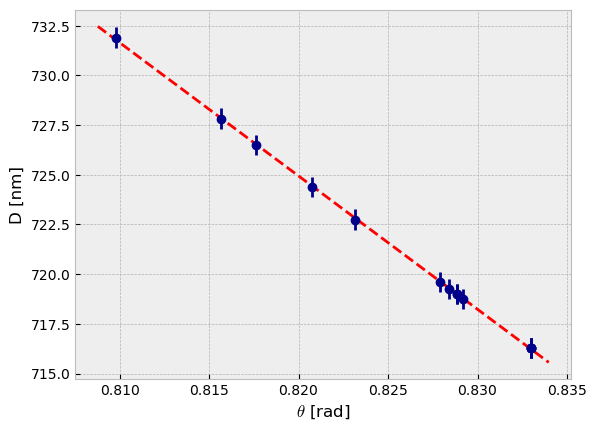

In [12]:
ajuste_recta_v = curve_fit(recta, angulos_v, d_v)[0]
aa = np.linspace(angulos_v.min() - 0.001,angulos_v.max() + 0.001,10**3)
def graf_V(A=1,B=1):
    plt.errorbar(angulos_v, d_v, xerr= err_ang_v, yerr=err_d_v, fmt = "o", color = "darkblue",ecolor = "darkblue")
    plt.plot(aa, recta(aa, A,B), color="red", ls="--")
    plt.xlabel(r"$\theta$ [rad]")
    plt.ylabel(r"D [nm]")
    plt.grid(True)
    res_v = d_v - recta(angulos_v, ajuste_recta_v[0], ajuste_recta_v[1])
    st_v = np.sum((d_v - np.mean(d_v))**2)
    sr_v = np.sum(res_v**2)
    r2_v = (st_v - sr_v)/st_v
    print("Coef de determinación:",r2_v)
graf_V(ajuste_recta_v[0], ajuste_recta_v[1])
plt.savefig("laser_verde.pdf")

Text(0, 0.5, 'D [nm]')

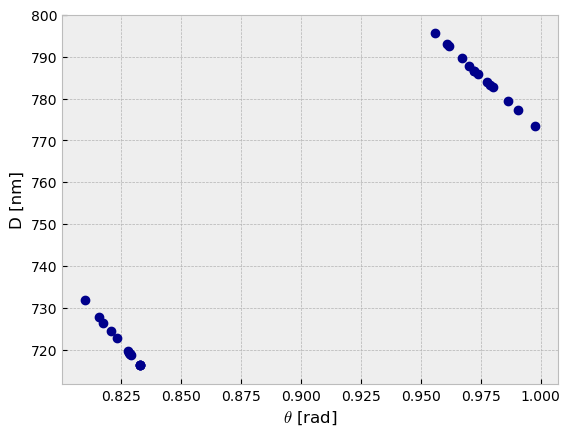

In [15]:
    plt.errorbar(angulos_v, d_v, xerr= err_ang_v, yerr=err_d_v, fmt = "o", color = "darkblue",ecolor = "darkblue", label= "Láser verde")
    plt.errorbar(angulos, d, xerr =err_ang, yerr=err_d, fmt = "o", color = "darkblue",ecolor = "darkblue", label = "Láser rojo")
    #plt.plot(xx, recta(xx, ajuste_recta[0],ajuste_recta[1]), color="red", ls = "--")
    #plt.plot(aa, recta(aa, ajuste_recta_v[0],ajuste_recta_v[0]), color="green", ls="--")
    plt.xlabel(r"$\theta$ [rad]")
    plt.ylabel(r"D [nm]")

In [23]:
matriz_v = curve_fit(recta, angulos_v, d_v)[1]
sigma_a2, sigma_b2 = np.sqrt(np.diagonal(matriz_v))
print(sigma_a2, sigma_b2)
print(ajuste_recta_v[0], ajuste_recta_v[1])
print(recta(0.8, ajuste_recta_v[0], ajuste_recta_v[1])) # Valor estimado por la aproximación lineal.

1.8852590596493455 1.5570434032829692
-671.0281960123924 1275.1847071910129
738.3621503810989


<ErrorbarContainer object of 3 artists>

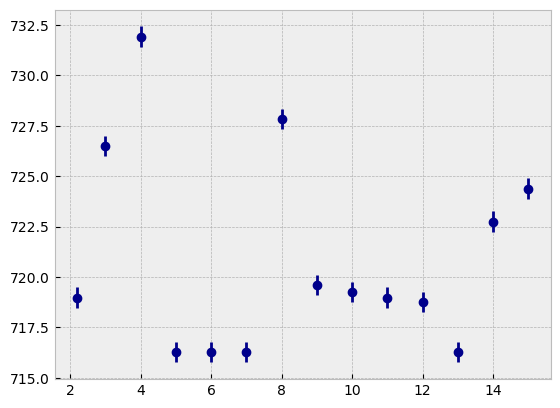

In [16]:
plt.errorbar(D_DVD_v, d_v, xerr= err_ang_v, yerr=err_d_v, fmt = "o", color = "darkblue",ecolor = "darkblue", label= "Láser verde")

<ErrorbarContainer object of 3 artists>

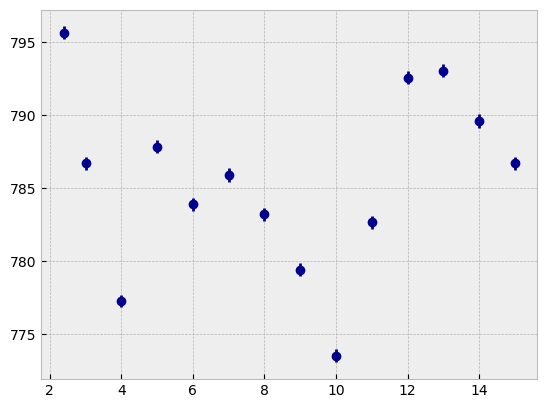

In [17]:
plt.errorbar(D_DVD, d, xerr= err_ang, yerr=err_d, fmt = "o", color = "darkblue",ecolor = "darkblue", label= "Láser rojo")

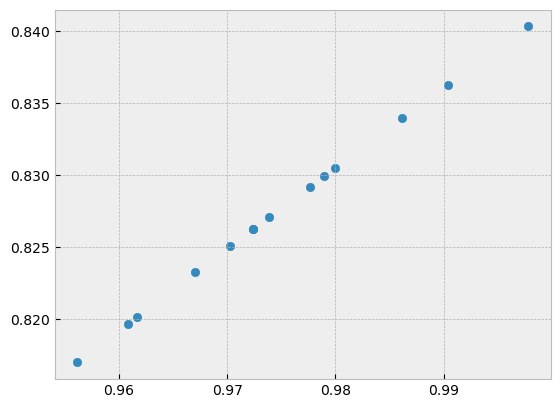

In [19]:
plt.scatter(angulos, np.sin(angulos))

In [21]:
print(d.min(), d.max())
print(d_v.min(), d.max())

773.5363474001849 795.6249311967722
716.2742214617098 795.6249311967722


In [34]:
print(np.mean(d), np.std(d))
print(np.mean(d_v), np.std(d_v))

785.5745280313987 5.959765876996319
721.0001536543293 4.763082962129382


In [39]:
c =785.5 *10**(-9)
d = 1.9 *10**(-4)
e = 97.4 * 10**(-4)
f = 5.9 * 10**(-9)

valor = np.sqrt((d/c)**2 + ((e/c**2)*f)**2)
valor

259.19548006184397